## Import the MNIST dataset and split into train, val and test

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [2]:
from tensorflow.keras.utils import to_categorical
import numpy as np

boundary = 50000
num_classes = 10

X_train = train_images[:boundary, :, :]
y_train = to_categorical(train_labels[:boundary], num_classes=num_classes)

X_val = train_images[boundary:, :, :]
y_val = to_categorical(train_labels[boundary:], num_classes=num_classes)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

print(X_train.dtype)
print(y_train.dtype)

print(y_train[0])

(50000, 28, 28)
(10000, 28, 28)
(50000, 10)
(10000, 10)
uint8
float32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Save the data using TensorFlow protobufs and TFRecord files

### Serialize the image & label

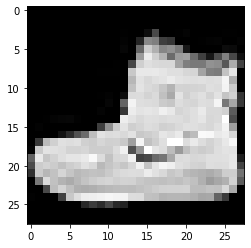

Sample image label =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
import matplotlib.pyplot as plt

sample_image_number = 0

# View the image we are serializing
plt.imshow(X_train[sample_image_number], cmap='gray')
plt.show()

print('Sample image label = ', y_train[sample_image_number])

image_tensor = tf.io.serialize_tensor(tensor = X_train[sample_image_number])
label_tensor = tf.io.serialize_tensor(tensor = y_train[sample_image_number])

### Define the the protobuf

In [4]:
from tensorflow.compat.v2.train import Feature, Features, Example, BytesList, FloatList

image_as_bytes = BytesList(value=[image_tensor.numpy()]) # Convert image to bytes list
label_as_bytes = BytesList(value=[label_tensor.numpy()]) # Convert label to bytes list

image_example = Example(
    features = Features(
        feature={
            'image': Feature(bytes_list = image_as_bytes),
            'label': Feature(bytes_list = label_as_bytes)
        }
    )
)

In [5]:
print(image_example)

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\010\022\002\010\034\022\002\010\034\"\220\006\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\rI\000\000\001\004\000\000\000\000\001\001\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000$\210\177>6\000\000\000\001\003\004\000\000\003\000\000\000\000\000\000\000\000\000\000\000\000\006\000f\314\260\206\220{\027\000\000\000\000\014\n\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\233\354\317\262k\234\241m@\027M\202H\017\000\000\000\000\000\000\000\000\000\000\000\001\000E\317\337\332\330\330\243\177yz\222\215X\254B\000\000\00

## Write the records to file

In [6]:
with tf.io.TFRecordWriter('my_records.tfrecord') as f:
    f.write(image_example.SerializeToString())

## Read the records from file

### Define what the protobuf entries are

In [7]:
feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.string)
}

### Read in the data

In [8]:
for serialized_example in tf.data.TFRecordDataset(['my_records.tfrecord']):
    parsed_example = tf.io.parse_single_example(serialized_example, feature_description)
    
# print(parsed_example['image'])
read_image = tf.io.parse_tensor(parsed_example['image'], out_type=tf.uint8)
read_label = tf.io.parse_tensor(parsed_example['label'], out_type=tf.float32)

### Check the image and label read from file are correct

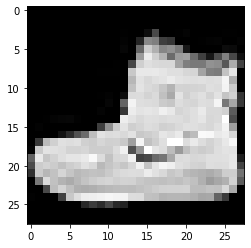

example label =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
import matplotlib.pyplot as plt

plt.imshow(read_image, cmap='gray')
plt.show()

print('example label = ', read_label.numpy())